In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.37:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 2 minutes ago,Total memory: 0 B


In [3]:
samples_bkg = [
    "TTJets", 
]

In [4]:
fileset_ori_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=-1, location_cfg="backgrounds_test.yaml")
fileset_skim_bkg = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", max_files=-1, location_cfg="backgrounds_test.yaml")

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(),  
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output_ori = runner.run(fileset_ori_bkg, treename="Events", processor_instance=p)
    output_skim = runner.run(fileset_skim_bkg, treename="Events", processor_instance=p)

out_ori = output_ori["out"]
out_skim = output_skim["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

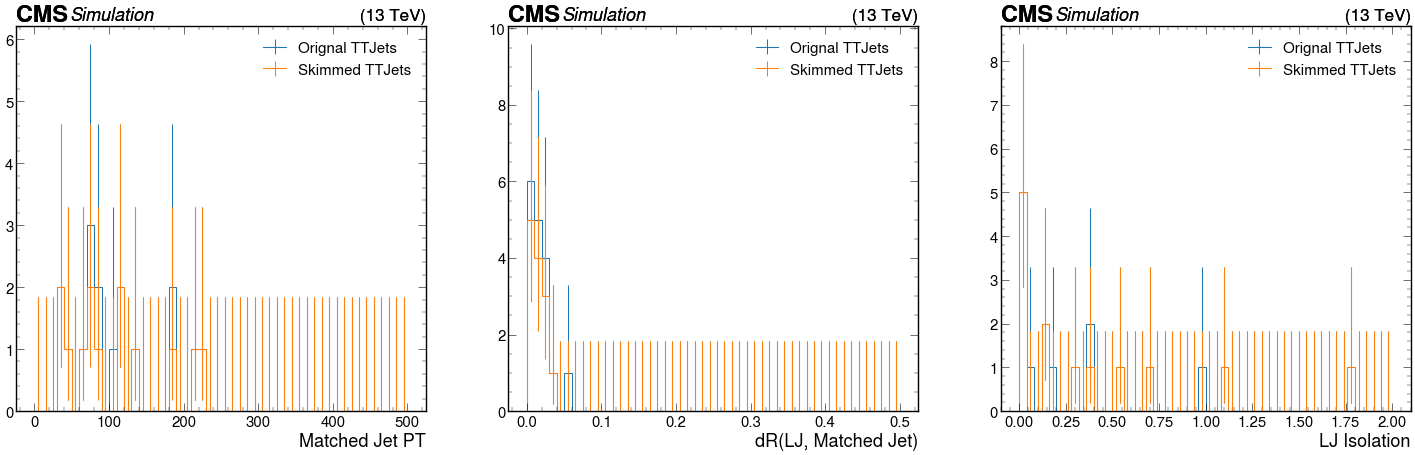

In [5]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out_ori[sample]["hists"]["matched_jet_pt"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["matched_jet_pt"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out_ori[sample]["hists"]["matched_jet_dR"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["matched_jet_dR"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out_ori[sample]["hists"]["lj_isolation"][channels[0], :], density=False, label="Orignal TTJets")
    utilities.plot(out_skim[sample]["hists"]["lj_isolation"][channels[0], :], density=False, label="Skimmed TTJets")
plt.legend()

In [ ]:
fileset_ori_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=6, location_cfg="backgrounds_test.yaml")
fileset_skim_bkg = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", max_files=6, location_cfg="backgrounds_test.yaml")

runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(),  
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base"],
    lj_reco_choices=["0.4"],
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output_ori = runner.run(fileset_ori_bkg, treename="Events", processor_instance=p)
    output_skim = runner.run(fileset_skim_bkg, treename="Events", processor_instance=p)

out_ori = output_ori["out"]
out_skim = output_skim["out"]

[                                        ] | 0% Completed |  0.0s

/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


[                                        ] | 0% Completed | 30.7s